# Predicting Gender Based On Acoustic Properties

![voice](../../../Assets/voice.jpg)

By ``Abhijeet Srivastav``

**Connect with me**
- [LinkedIn](https://www.linkedin.com/in/abhijeet-srivastav-02245a18b/)
- [Github](https://github.com/AbhijeetSrivastav/Data-Science-Guide)
- [Social](https://www.instagram.com/abhijeet.codes/)

**AIM-** Predicting the gender based on acoustic properties(voice).

**Dataset Information**

- In order to analyze gender by voice and speech, a training database was required. A database was built using thousands of samples of male and female voices, each labeled by their gender of male or female. Voice samples were collected from the following resources:
    - The Harvard-Haskins Database of Regularly-Timed Speech 
Telecommunications & Signal Processing Laboratory (TSP) Speech        
    - Database at McGill University
    - VoxForge Speech Corpus
    - Festvox CMU_ARCTIC Speech Database at Carnegie Mellon University

- Each voice sample is stored as a .WAV file, which is then pre-processed for acoustic analysis using the specan function from the WarbleR R package. Specan measures 22 acoustic parameters on acoustic signals for which the start and end times are provided.

- The output from the pre-processed WAV files were saved into a CSV file, containing `3168` rows and `21` columns (20 columns for each feature and one label column for the classification of male or female). 

- Dataset [Source](https://data.world/ml-research/gender-recognition-by-voice)

**Attribute Information**
The following acoustic properties of each voice are measured:

1. `duration`: length of signal
2. `meanfreq`: mean frequency (in kHz)
3. `sd`: standard deviation of frequency
4. `median`: median frequency (in kHz)
5. `Q25`: first quantile (in kHz)
6. `Q75`: third quantile (in kHz)
7. `IQR`: interquantile range (in kHz)
8. `skew`: skewness (see note in specprop description)
9. `kurt`: kurtosis (see note in specprop description)
10. `sp.ent`: spectral entropy
11. `sfm`: spectral flatness
12. `mode`: mode frequency
13. `centroid`: frequency centroid (see specprop)
14. `peakf`: peak frequency (frequency with highest energy)
15. `meanfun`: average of fundamental frequency measured across acoustic signal
16. `minfun`: minimum fundamental frequency measured across acoustic signal
17. `maxfun`: maximum fundamental frequency measured across acoustic signal
18. `meandom`: average of dominant frequency measured across acoustic signal
19. `mindom`: minimum of dominant frequency measured across acoustic signal
20. `maxdom`: maximum of dominant frequency measured across acoustic signal
21. `dfrange`: range of dominant frequency measured across acoustic signal
22. `modindx`: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range


## 0. Required Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

In [4]:
%matplotlib inline
warnings.filterwarnings("ignore")

## 1. Data Collection

In [5]:
df = pd.read_csv("../../../Dataset/voice.csv")

In [6]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


As dataset is fresh and don't need any preprocessing before EDA so moving towards EDA.

## 2. Exploratory Data Analysis

### 2.1. Checking for Missing Values

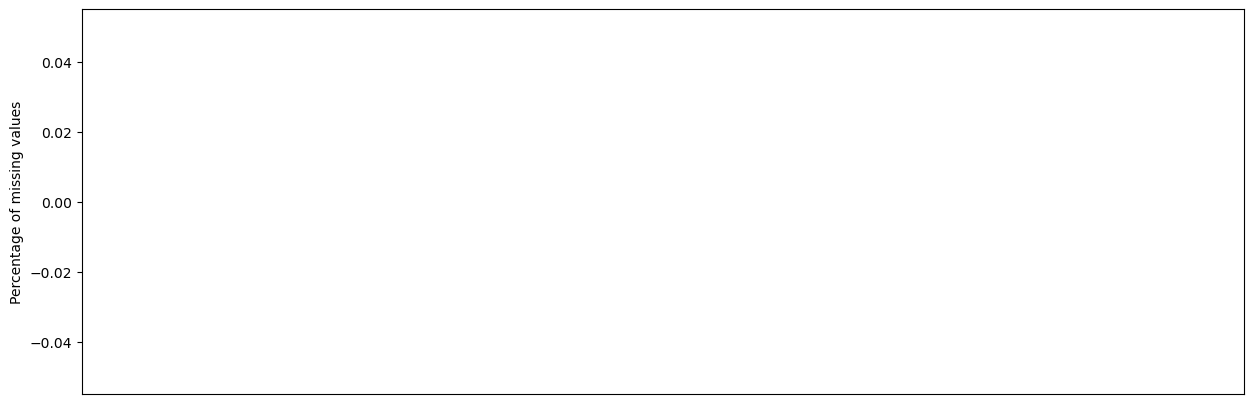

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))

"dividing the sum of na values in each column to the number of total values in that column, then multiplying it to convert into percentage after that showing in frame after sorting from 0 in descending order"

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)

ax.bar(missing.index, missing.values.T[0])


plt.xticks([])
plt.ylabel("Percentage of missing values")
plt.show()

In [10]:
df.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

**Observations:**
    - Their are no missing values.

### 2.2. Checking for the Data types of features

In [11]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

**Observations:**
    - All the input features are in float64 type.
    - Label feature which is our target is object type and we need to encode it.

### 2.3. Encoding target feature label

Encoding:
- Male as `1`
- Female as `0`

In [12]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()
df["label"] = encoder.fit_transform(df["label"])

### 2.4. Visualizing unique classes and their count in target

<AxesSubplot: xlabel='label', ylabel='Count'>

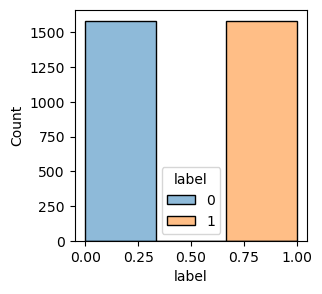

In [59]:
plt.figure(figsize=(3,3))
sns.histplot(df, x="label", hue="label", bins=3)

In [22]:
df["label"].value_counts()

1    1584
0    1584
Name: label, dtype: int64

**Observations:**
- Dataset is perfectly balanced as each class in label has 1584 rows.
- No need of imputation.

### 2.5. Distribution of each of independent features

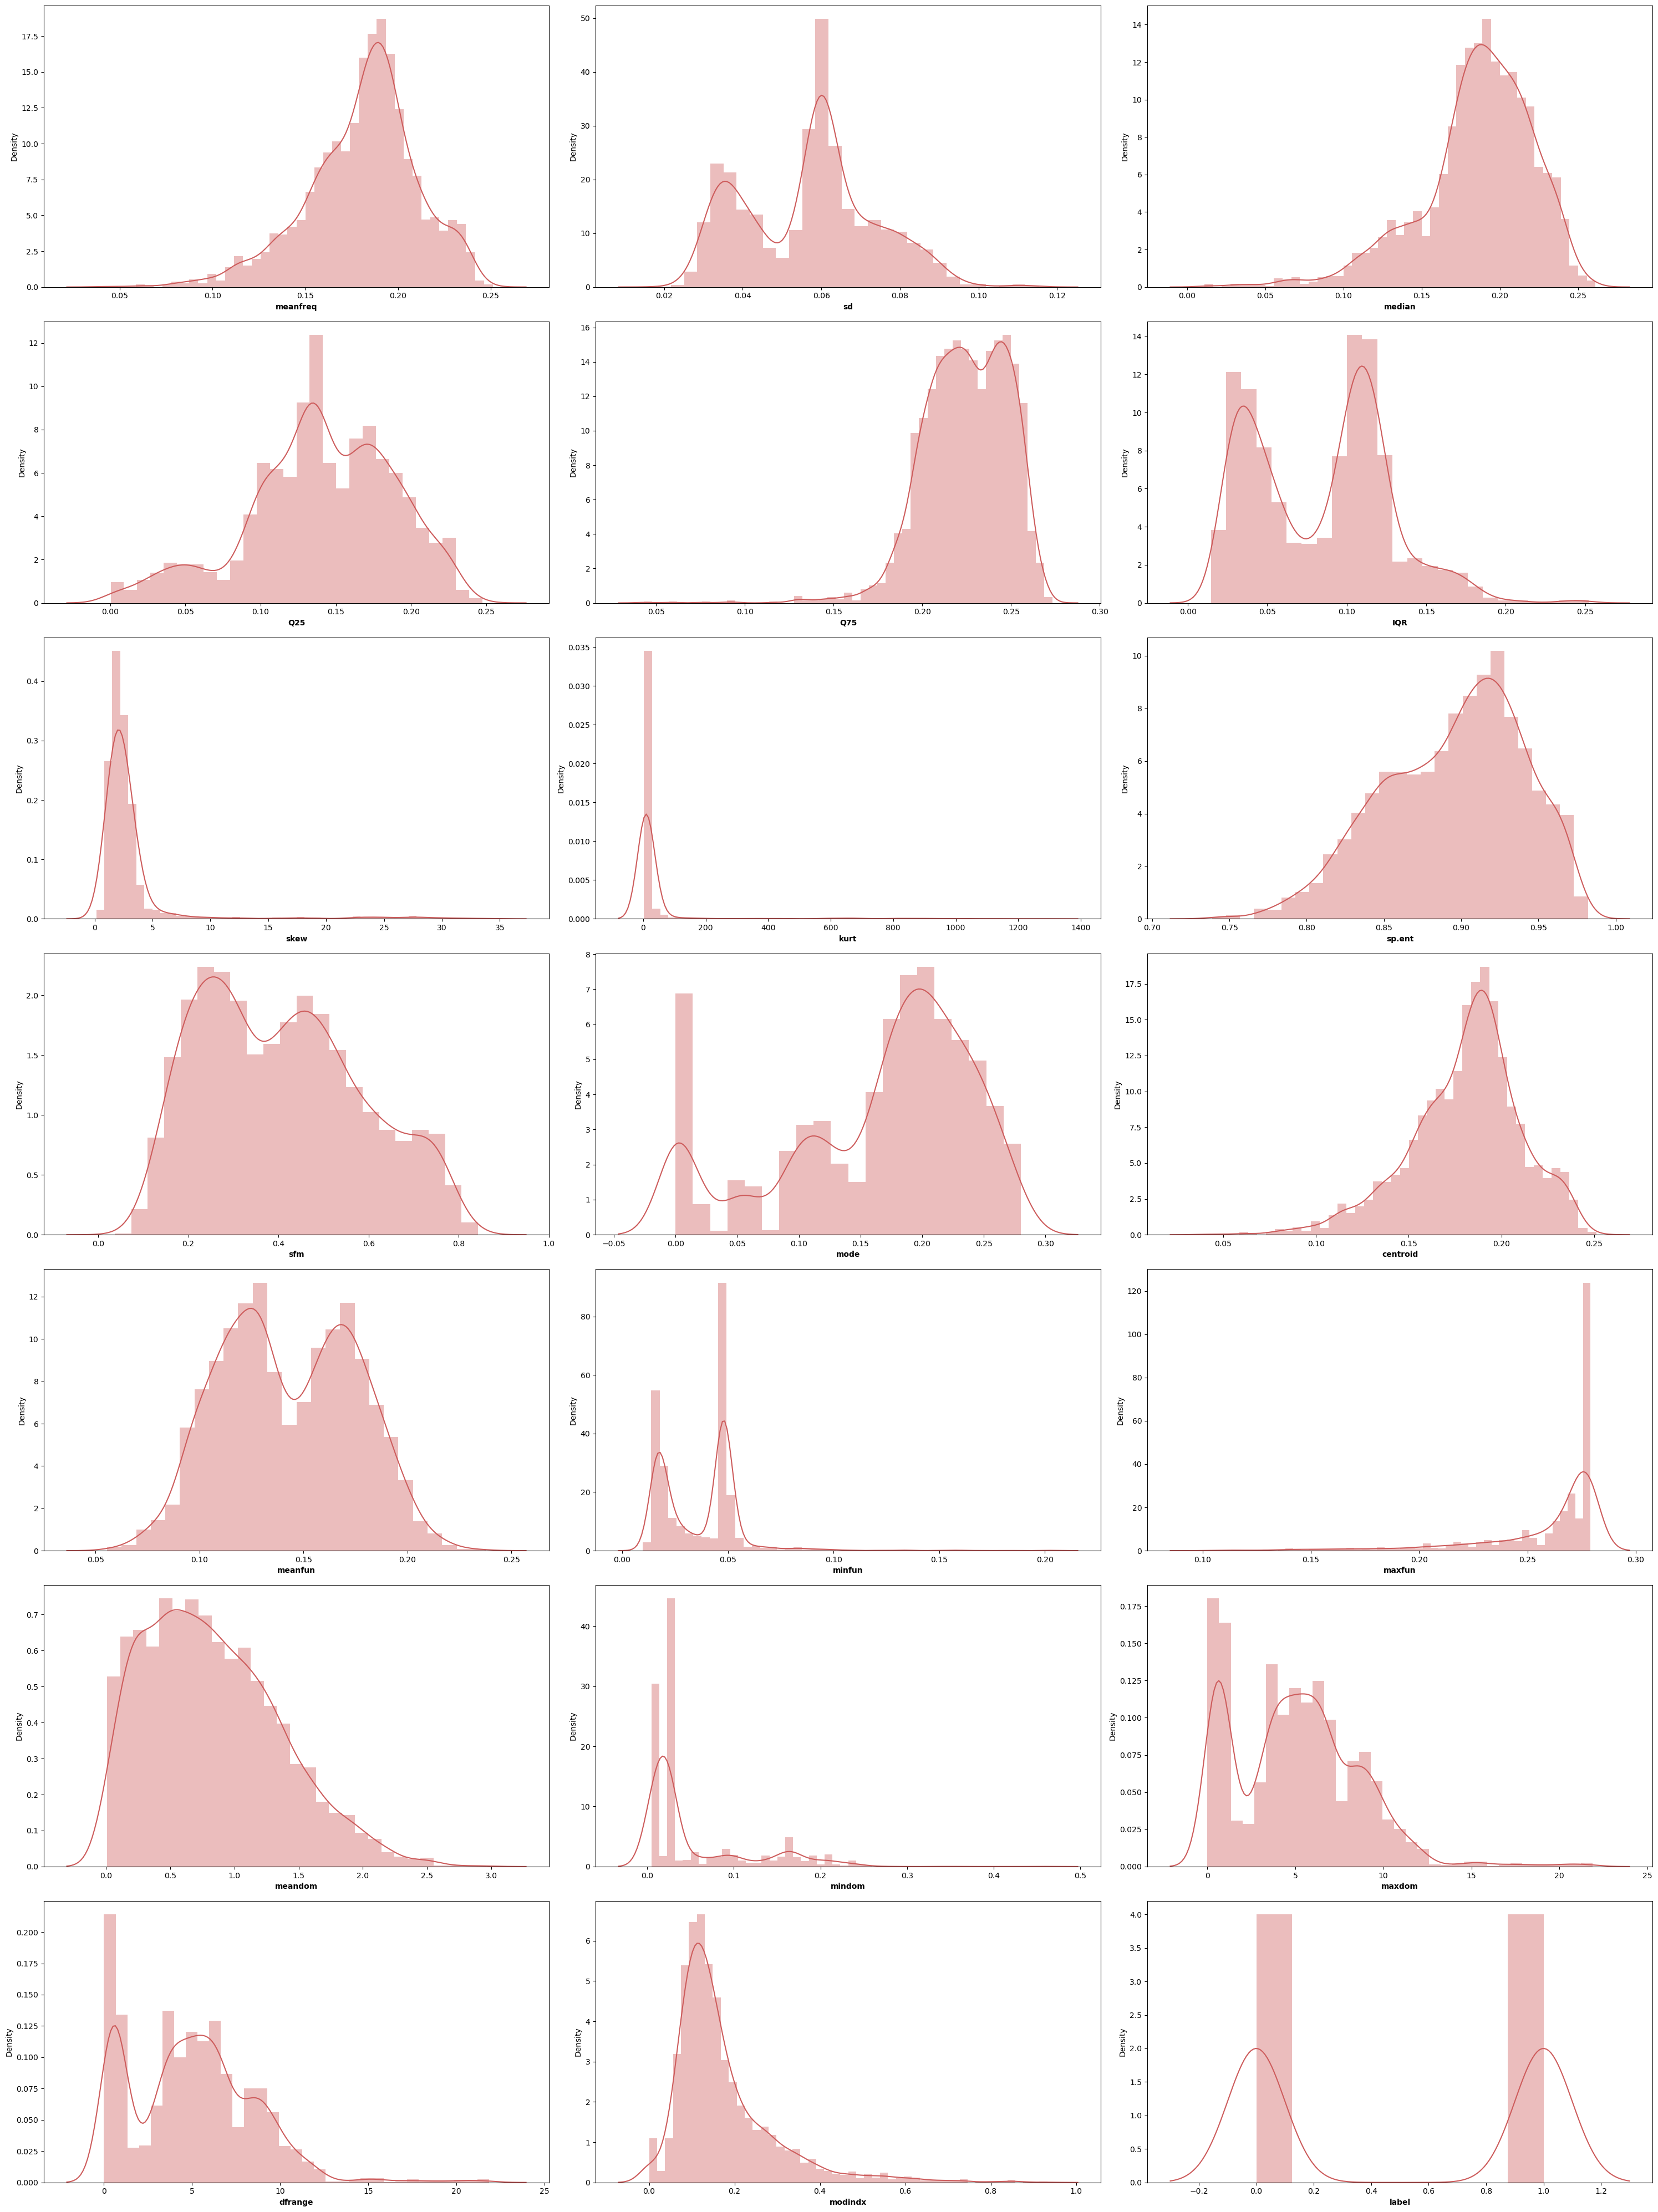

In [63]:
plt.figure(figsize=(30, 40))

for i, feature in enumerate(df.columns):
    plt.subplot(7, 3, i+1)
    sns.distplot(x=df[feature], color="indianred")
    plt.xlabel(feature, weight="bold")
    plt.tight_layout()

### 2.6. Distribution of each independent feature with overlay of label class

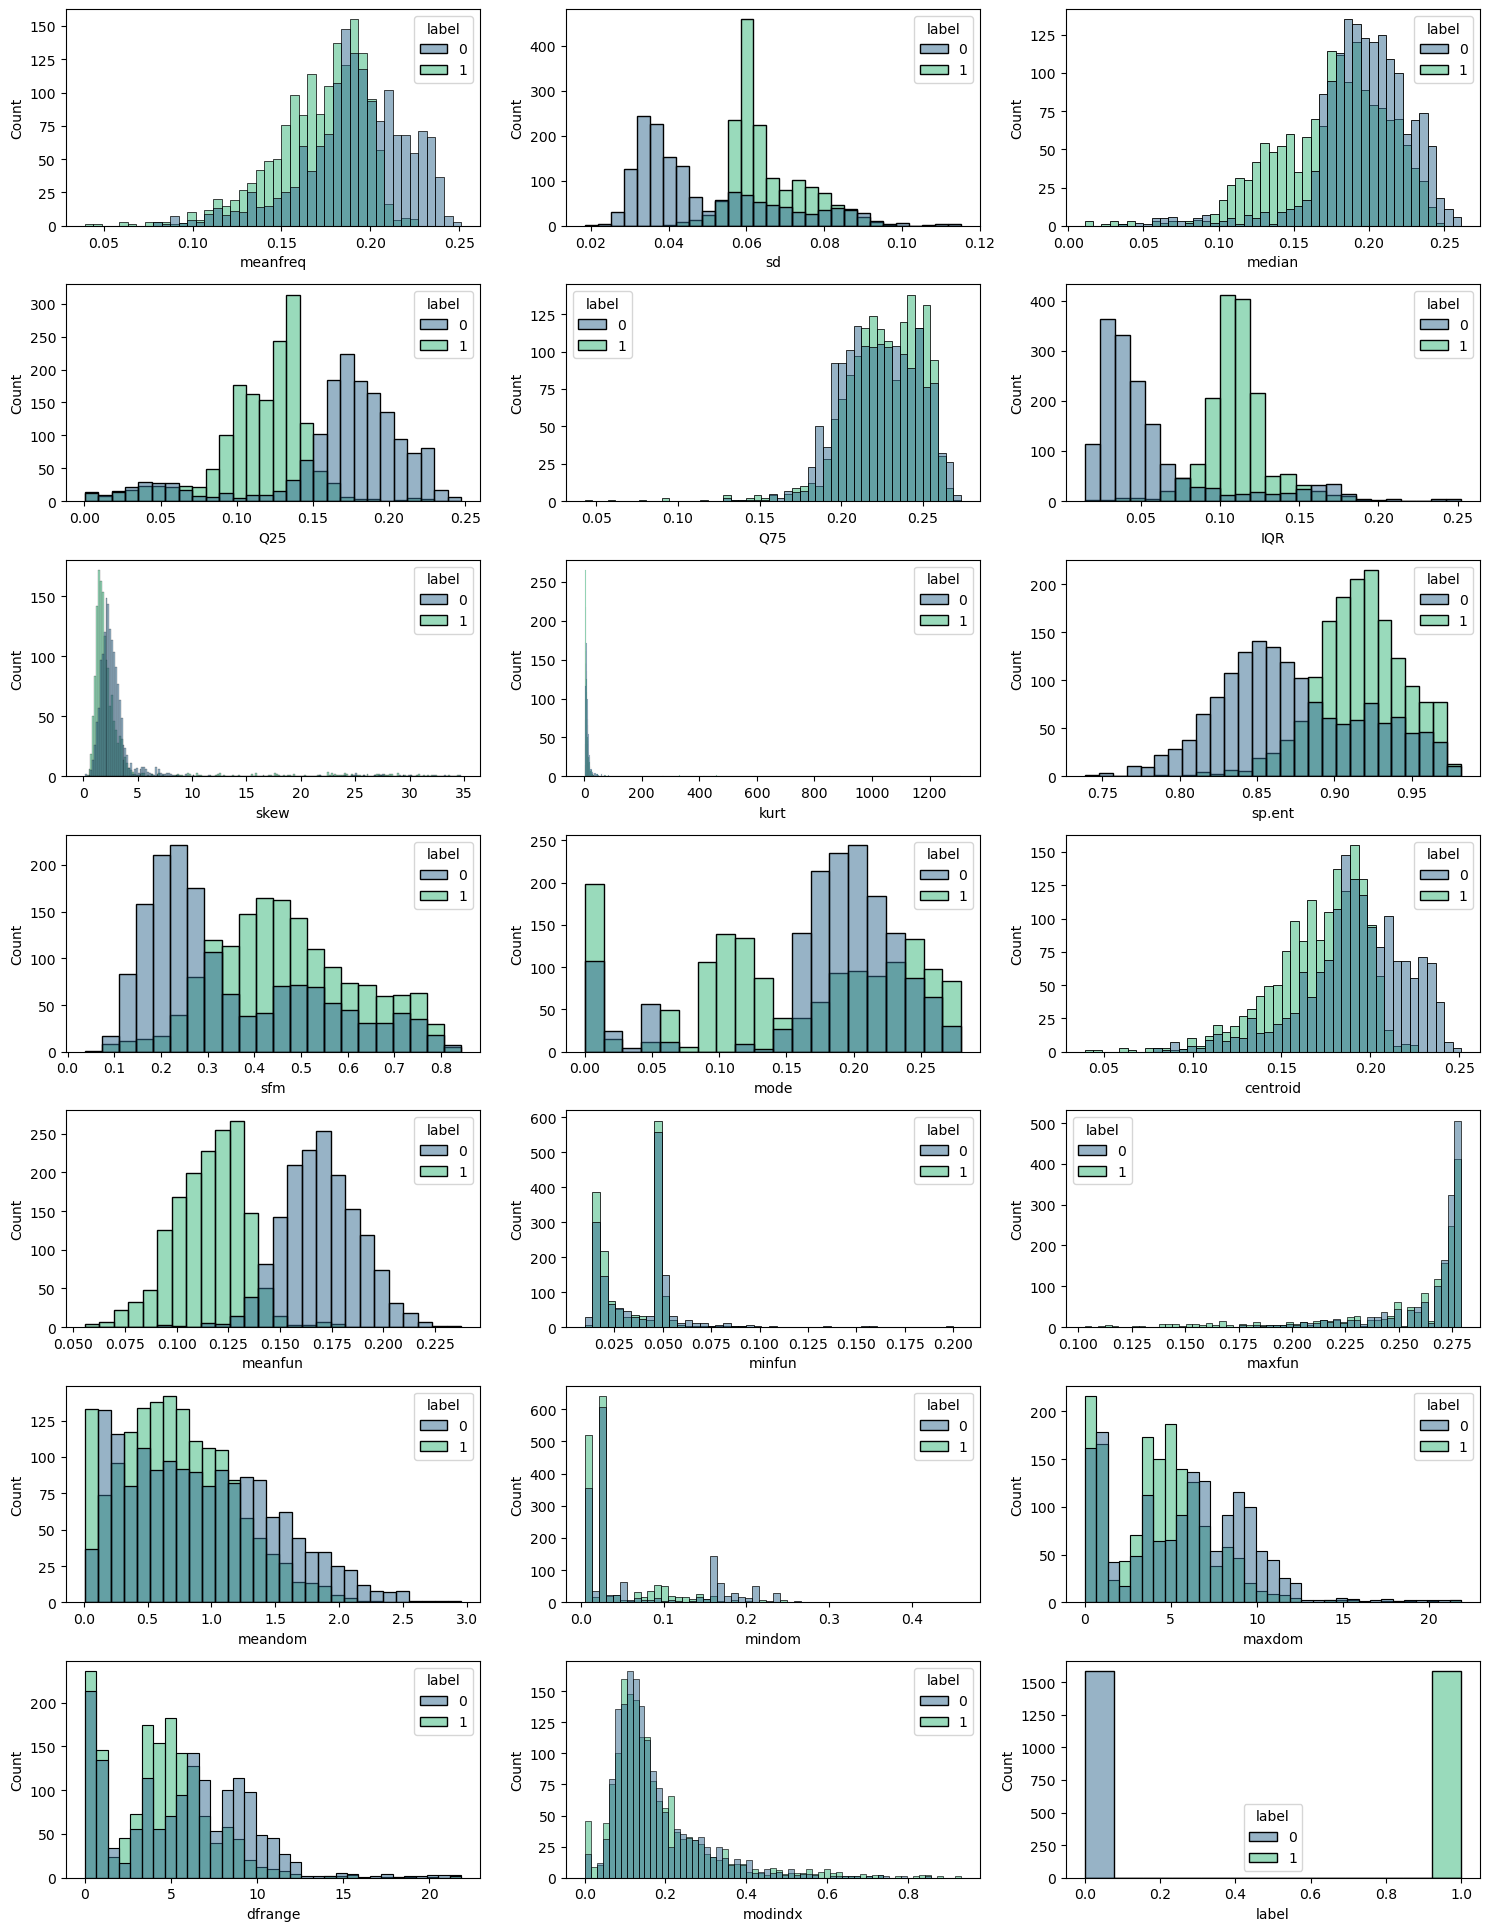

In [61]:
plt.figure(figsize=(15, 30))

n = 1
for feature in df.columns:
    plt.subplot(11, 3, n)
    n += 1
    sns.histplot(df, x=feature, hue="label", palette="viridis")
    plt.tight_layout()

**Observations:** From section 2.5 and 2.6
- Distribution of feature don't matter for us as we are going to use Support Vector Classifier which as no assumption regarding the distribution.
- Almost even distribution of target class label in all of the input features.
- Scaling is required.

### 2.7. Detection of Outliers

Detecting Outliers using Box Plot

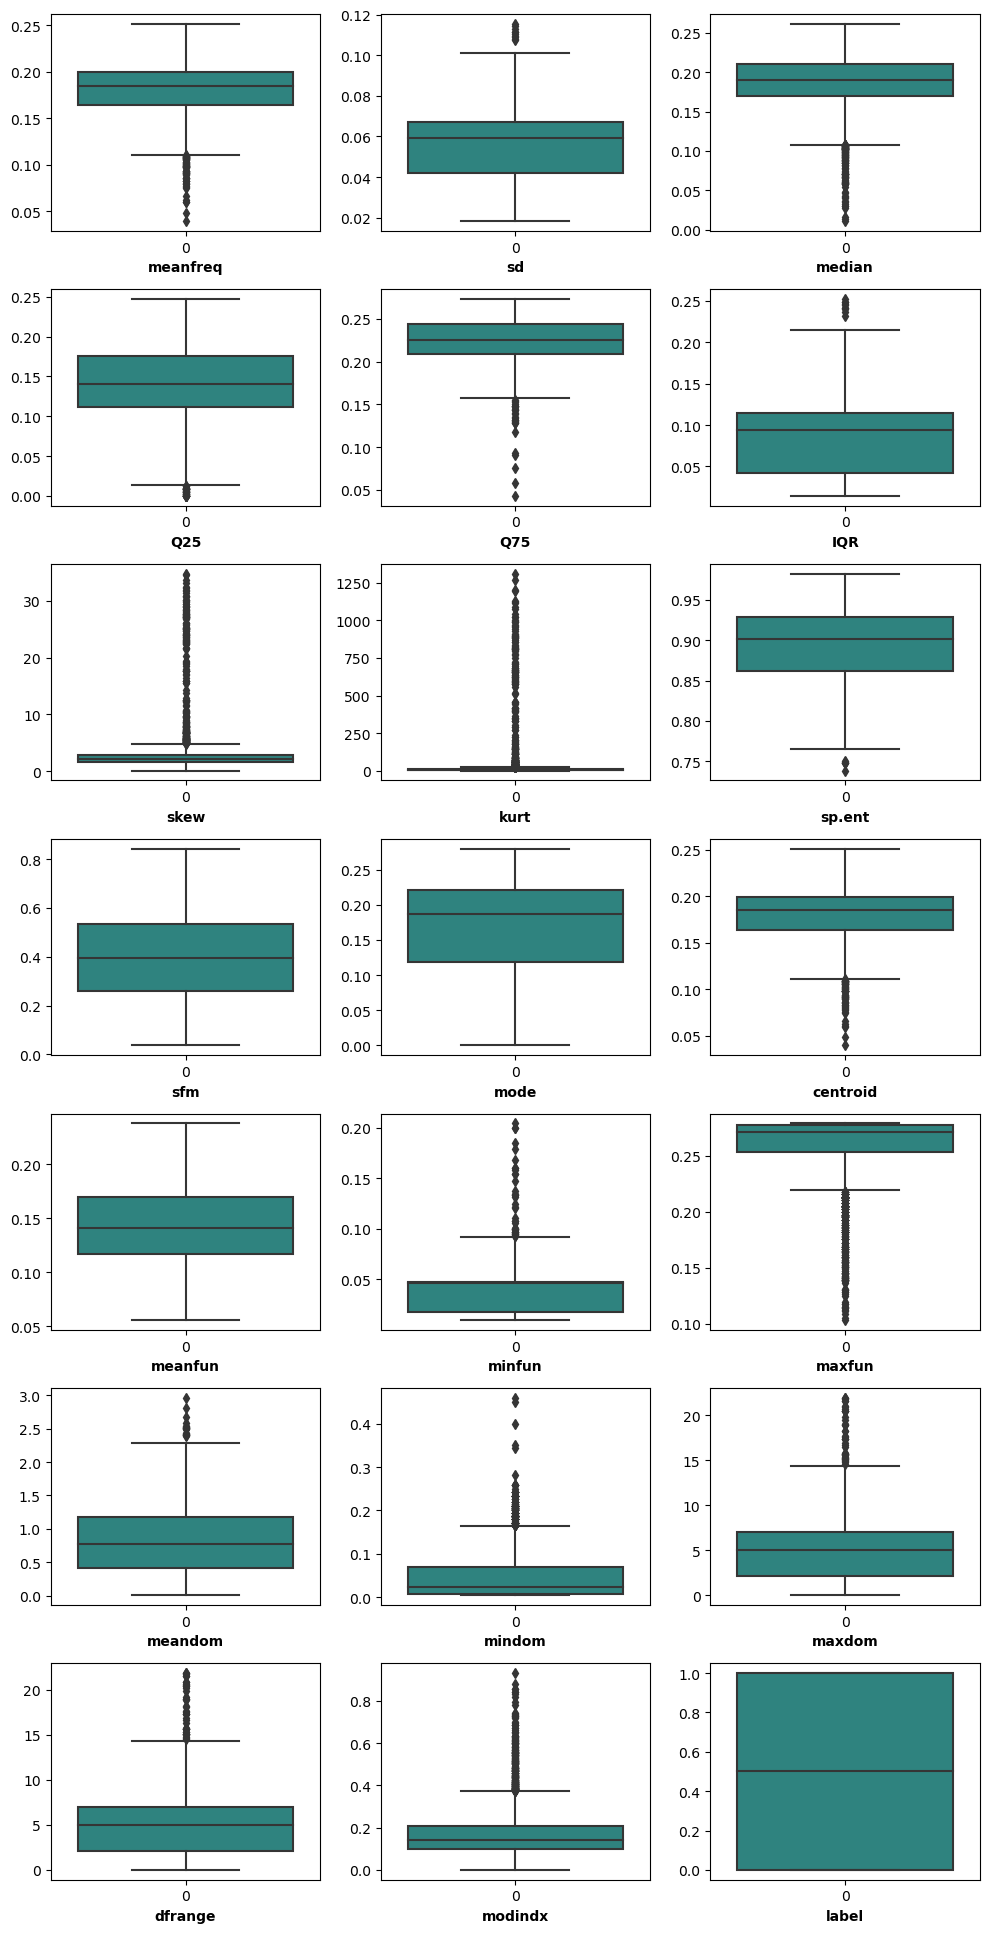

In [53]:
n = 1
plt.figure(figsize=(10, 30))
for feature in df.columns:
    plt.subplot(11, 3, n)
    n += 1
    sns.boxplot(df[feature], palette="viridis")
    plt.xlabel(xlabel=feature, weight="bold")
    plt.tight_layout()

**Observations:**
- Their are large number of outliers in many of the features.
- But we don't need to handle them manually.
- SVM classifier will do it when we will tune it using different `kernels`.

### 2.8. Correlation of features

<AxesSubplot: >

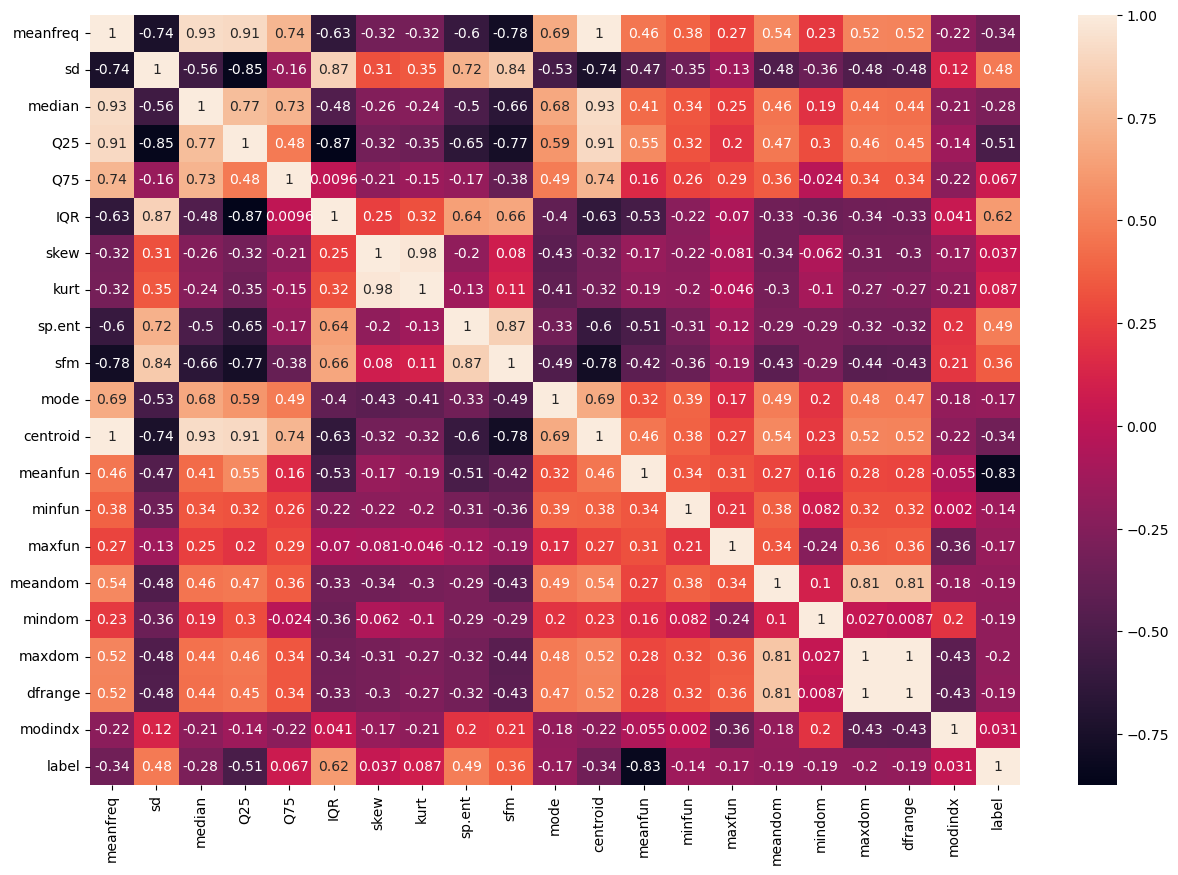

In [69]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

**Observations:**
- Highly Correlated features (>0.9)
    - `meanfreq` and `median`
    - `meanfreq` and `Q25`
    - `meanfreq` and `centroid`
    - `median` and `centroid`
    - `Q25` and `centroid`
    - `skew` and `kurt`
    - `maxdom` and `difrange`
- These highly correlated features need to be removed.

### 2.9. Treating Multicollinearity

In [72]:
correlated_features = set()
correlation_matrix = df.corr()

In [73]:
for i in range(len(correlation_matrix.columns)): # for columns
    for j in range(i): # for rows of each column
        if abs(correlation_matrix.iloc[i, j] > 0.9):
            col_name = correlation_matrix.columns[i]
            correlated_features.add(col_name)

In [76]:
correlated_features

{'Q25', 'centroid', 'dfrange', 'kurt', 'median'}

In [77]:
df.drop(correlated_features, axis=1, inplace=True)

## 3. Model Building

### 3.1. Feature segregation

In [78]:
x = df[df.columns.drop("label")]
y = df["label"]

### 3.2. Train Test Split

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

### 3.3. Feature Scaling

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()

In [85]:
x_train = scaler.fit_transform(x_train)

### 3.4. Support Vector Classifier(SVC) Model

In [86]:
from sklearn.svm import SVC

In [87]:
svc = SVC()

In [88]:
svc.fit(x_train, y_train)

SVC()

### 3.5. HyperParameter Tunning

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
parameters = {
    "C": [0.1,1, 10, 100], 
    "gamma": [1,0.1,0.01,0.001],
    "kernel": ["linear", "rbf", "poly", "sigmoid"]
    }

In [91]:
tunned_SVC = GridSearchCV(estimator=SVC(), param_grid=parameters)

In [92]:
tunned_SVC.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [93]:
tunned_SVC.best_estimator_

SVC(C=10, gamma=0.1)

In [94]:
tunned_SVC.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

**Observations:** Best parameters
- C = 10
- gamma = 0.1
- kernel = rbf

## 4. Model Evaluation

In [105]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.metrics import plot_confusion_matrix
from prettytable import PrettyTable

In [106]:
def eval_model(model: object, y_pred:df, y_test:df):

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    # roc_auc = roc_auc_score(y_test, y_pred, multi_class="ovr")
    f1 = f1_score(y_test, y_pred, average="weighted")

    pt = PrettyTable()
    
    pt.field_names = ["Model", "Accuracy Score",  "Recall Score", "Precision Score", "F 1 Score", ]

    pt.add_row(["Raw_KNN", accuracy, recall, precision, f1])

    print(pt)

### 4.1 Metrics of untuned SVC

In [109]:
y_pred_untuned = svc.predict(scaler.transform(x_test))

In [110]:
eval_model(svc, y_pred_untuned, y_test)

+---------+--------------------+--------------------+--------------------+--------------------+
|  Model  |   Accuracy Score   |    Recall Score    |  Precision Score   |     F 1 Score      |
+---------+--------------------+--------------------+--------------------+--------------------+
| Raw_KNN | 0.9779179810725552 | 0.9779179810725552 | 0.9779166196968662 | 0.9779162129727942 |
+---------+--------------------+--------------------+--------------------+--------------------+


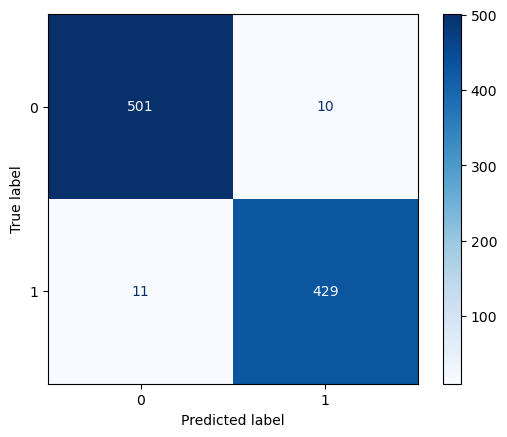

In [120]:
plot_confusion_matrix(svc, scaler.transform(x_test), y_test, cmap="Blues", values_format="d")

### 4.2. Metrics of tunned SVC

In [116]:
y_pred_tunned = tunned_SVC.predict(scaler.transform(x_test))

In [117]:
eval_model(tunned_SVC, y_pred_tunned, y_test)

+---------+--------------------+--------------------+--------------------+--------------------+
|  Model  |   Accuracy Score   |    Recall Score    |  Precision Score   |     F 1 Score      |
+---------+--------------------+--------------------+--------------------+--------------------+
| Raw_KNN | 0.9800210304942166 | 0.9800210304942166 | 0.9800263182735415 | 0.9800225852761072 |
+---------+--------------------+--------------------+--------------------+--------------------+


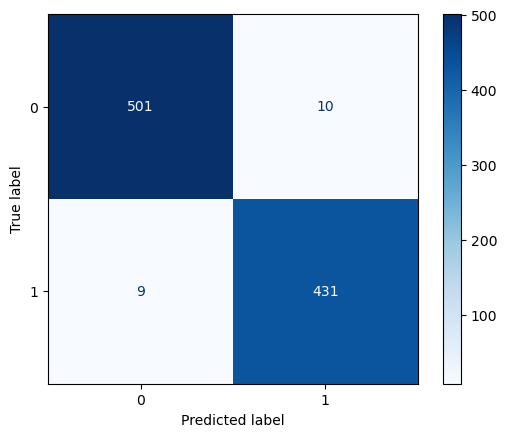

In [119]:
plot_confusion_matrix(tunned_SVC, scaler.transform(x_test), y_test, cmap="Blues", values_format="d")

### 4.3. Cross Validating Tunned SVC

In [123]:
from sklearn.model_selection import cross_val_score

In [124]:
scores = cross_val_score(tunned_SVC, x_train, y_train, cv=10, scoring="accuracy")

In [125]:
scores

array([0.96846847, 0.97747748, 0.97747748, 0.99099099, 0.97747748,
       0.97747748, 0.97747748, 0.99547511, 0.97737557, 0.97737557])

In [126]:
scores.mean()

0.9797073091190738

## 5. Pickling

In [121]:
import pickle

In [122]:
tunned_SVC_model = pickle.dump(tunned_SVC, open("tunned_SVC.pkl", "wb"))